# Load final model & test data

Classification Report:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        10
           2       0.30      0.67      0.41        12
           3       0.56      0.31      0.40        16

    accuracy                           0.33        40
   macro avg       0.21      0.24      0.20        40
weighted avg       0.31      0.33      0.28        40



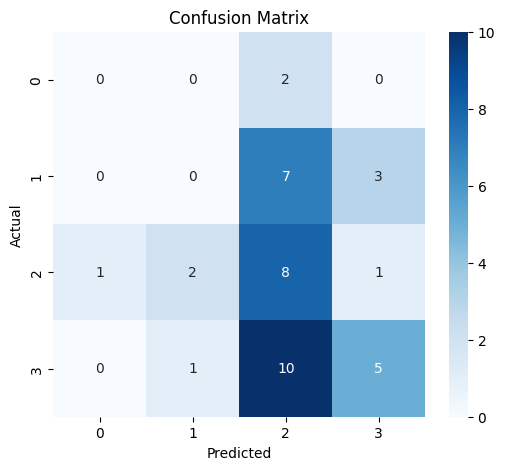

In [6]:
import joblib
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load saved model
model = joblib.load('D:/Users/balans/Desktop/PBI/Customer Support Ticket Prioritization/models/final_model.pkl')
X_test = joblib.load('D:/Users/balans/Desktop/PBI/Customer Support Ticket Prioritization/models/X_test.pkl')
y_test = joblib.load('D:/Users/balans/Desktop/PBI/Customer Support Ticket Prioritization/models/y_test.pkl')
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report: ",classification_report(y_test, y_pred))

# Confusion matrix visualization
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [10]:
# Accuracy & F1 Score
from sklearn.metrics import accuracy_score, f1_score

acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {acc:.2f}")
print(f"Weighted F1 Score: {f1:.2f}")

Accuracy: 0.33
Weighted F1 Score: 0.28


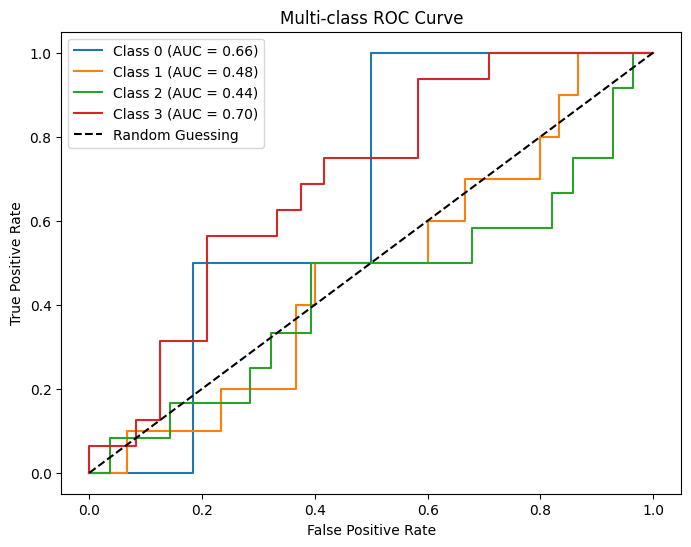

In [11]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize

# One-hot encode y_test
y_test_bin = label_binarize(y_test, classes=sorted(y_test.unique()))
y_score = model.predict_proba(X_test)

# Plot ROC for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(y_test_bin.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(8, 6))
for i in range(len(roc_auc)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC Curve')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score

metrics_dict = {
    'Model': ['Random Forest'],  # Change if needed
    'Accuracy': [accuracy_score(y_test, y_pred)],
    'F1 Score (weighted)': [f1_score(y_test, y_pred, average='weighted')],
    'Precision (weighted)': [precision_score(y_test, y_pred, average='weighted')],
    'Recall (weighted)': [recall_score(y_test, y_pred, average='weighted')]
}

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics_dict)

# Save to CSV
metrics_df.to_csv('D:/Users/balans/Desktop/PBI/Customer Support Ticket Prioritization/reports/model_metrics.csv', index=False)


# # Append to CSV (instead of overwrite)
# import os

# metrics_file = '../reports/model_metrics.csv'

# if os.path.exists(metrics_file):
#     existing = pd.read_csv(metrics_file)
#     updated = pd.concat([existing, metrics_df], ignore_index=True)
# else:
#     updated = metrics_df

# updated.to_csv(metrics_file, index=False)

In [14]:
import os


report_dict = classification_report(y_test, y_pred, output_dict=True)

# Convert to DataFrame
report_df = pd.DataFrame(report_dict).transpose().reset_index().rename(columns={'index': 'Class'})

# Save or append to CSV
report_path = 'D:/Users/balans/Desktop/PBI/Customer Support Ticket Prioritization/reports/classification_report.csv'

if os.path.exists(report_path):
    existing_df = pd.read_csv(report_path)
    combined_df = pd.concat([existing_df, report_df], ignore_index=True)
    combined_df.to_csv(report_path, index=False)
else:
    report_df.to_csv(report_path, index=False)